# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Содержание
### [1. Общая информация о данных](#section_id1)
### [2. Предобработка данных](#section_id2)
### [3. Новые признаки](#section_id3)
### [4. Исследовательский анализ данных](#section_id4)
### [5. Общий вывод](#section_id5)

<a id='section_id1'></a>

### 1. Общая информация о данных. 

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости, найсти аномалии и определить мошенников.
Исходные данные:<br>
airpotrs_nearest - расстояние до ближайшего аэропорта (м);<br>
balcony - число балконов;<br>
ceiling_height - высота потолков;<br>
cityCenters_nearest - расстояние до центра города;<br>
days_exposition - сколько дней было размещено объявление;<br>
first_days_exposition - дата публикации;<br>
floor - этаж;<br>
floors_total - всего этажей в доме;<br>
is_apartment - апартаменты (булев тип);<br>
kitchen_area - площадь кухни (кв. м);<br>
last_price - цена на момент снятия с публикации;<br>
living_area - жилая площадь (кв. м);<br>
locality_name - название населенного пункта;<br>
open_plan - свободная планировка;<br>
parks_around3000 - число парков в радиусе 3 км;<br>
parks_nearest - расстояние до ближайшего парка (м);<br>
ponds_around3000 - водоемы в радиусе 3 км ;<br>
ponds_nearest - ближайший водоем (м);<br>
rooms - число комнат;<br>
studio - квартира студия (булев тип);<br>
total_area - площадь квартиры (кв. м);<br>
total_images - число фото квартир в объявлении;<br>

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Как говорится идеальных данных нет: пропуски имеются во многих столбцах, а именно:
1. ceiling_heights - высота потолков (посмотрим на зависимости на сколько это критично влияет на цену)
2. floors_total - всего этажей в доме (может оставим также или поищем аналоги по нескольким параметрам (населенный пункт, цены на квартиру в данном населенном пункте, расстояние до центра, до аэропорта - здесь можем использовать квантили, чтобы примерно разбить на одинаковое кол-во))
3. living_area - жилая площадь (если в данных строках будут данные по общей площади квартиры и кухни, то сможем найти разницу(правда надо еще учесть ванную комнату и коридоры=)))
4. is_apartment - апартаменты (думаю если их не указали, значит их нет и можно будет занулить)
5. kitchen_area - площадь кухни (по аналогии с living_room)
6. balcony - балконы (тоже можно занулить если их не указали, а можно присвоить значения равное кол-во комнат и кухни)
7. Locality_name - наименование населенного пункта (нулевых строк всего 49, не думаю если мы их удалим, это как то сильно повлияет на нашу точность)
8. airports_nearest - расстояние до аэропорта (не знаю как нивелировать данные параметры, это сильно влияет на цены и если мы удалим строки то потеряем данные)
9. cityCenters_nearest - расстояние до центра города (можно попробовать взять определенный населенный пункт и взять медиану или среднюю)
10. parks_around3000 - число парков в радиусе 3 км (не знаю насколько сильно зависят от цены от кол-ва парков (видимо чем больше парков тем дешевле, потому что это пригороды Питера, инфраструктура слабая), но если нет данных, то видимо они отсутствуют)
11. parks_nearest - расстояние до ближайшего парка (тут если parks_around = 0, то и parks_nearest = 0)
12. ponds_around3000 - кол-во водоемов в радиуес 3 км (тут можно тоже взять медиану по населенным пунктам)
13. Pond_nearest - расстояние до ближайшего водоема (если pounds_around3000 = 0, то и pounds_nearest = 0)
14.days_exposition - кол-во дней размещения объявления

<a id='section_id2'></a>

### 2. Предобработка данных

Исследуем все столбцы с пропущенными значениями

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Итак, видим:<br>
1. ceiling_height высота потолков в некоторых местах достигает до 100 м. Явно это выброс, примем оптимальную высоту потолков от 2,5 до 3,5 м<br>
2. floors_total - не так много пропущенных значений, имеет смысл посмотреть остальные столбцы в данных строках (если там будут отсутствовать необходимые нам данные, то смело можем удалять данные строки)<br>
3. is_apartment - если не указали, то их нет (занулим)<br>
4. kitchen_area - найдем аналогичные площади с одинаковым кол-вом комнат и вобьем медиану<br>
5. locality_name - возможно проведем лемматизацию для более удобной сортировки<br>
6. airports_nearest - мб оставлю так
7. cityCenters_nearest - можно попробовать разбить на квантили (поменять наименование столбца)<br>
8. с парками и водоемами решено (если в радиусе 3 км нет их, расстояние до ближайшего парка спокойно зануляем) 

Начнем предобработку с балконов (нет данных, можно предположить, что их просто нет) и высот потолков (можно предположить если кол-во этажей совпадает, то примерная высота одинаковая и найдем ее по медиане)

In [5]:
df['balcony'] = df['balcony'].fillna(0)

In [6]:
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [7]:
df.loc[(3.5 < df['ceiling_height']) & (df['ceiling_height'] < 4.0), 'is_apartment'] = df['is_apartment'].fillna(True)

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [9]:
df['is_apartment'].value_counts()

False    23486
True       213
Name: is_apartment, dtype: int64

In [10]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [11]:
df['ceiling_height'].sort_values(ascending=False)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
10773     27.0
         ...  
23687      NaN
23690      NaN
23692      NaN
23695      NaN
23696      NaN
Name: ceiling_height, Length: 23699, dtype: float64

In [12]:
df.query('4 < ceiling_height <= 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.2,2,False,False,False,12.2,0.0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,False,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,False,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,False,False,NaN,0.0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,False,False,False,NaN,0.0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,False,False,False,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Имеются выбросы, которые мы отбросим (чуть позже)

Также NaN заменим средним значением (обратную апартаментам, если апартаменты то 3,5, если нет то 2,7 м)

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(0)

In [14]:
df['ceiling_height'].value_counts()

0.00     9195
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
26.00       1
3.88        1
3.29        1
3.83        1
3.58        1
Name: ceiling_height, Length: 184, dtype: int64

In [15]:
#создадим уникальный массив по столбцу floors_total
mass = df['floors_total'].unique()
mass

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [16]:
#создадим цикл, он будет присваивать значения высоты потолков по домам с одинаковой этажностью
for i in mass:
    df.loc[(df['ceiling_height']==0)&(df['floors_total']==i), 'ceiling_height'] = df[df['floors_total']==i]['ceiling_height'].median()

In [17]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.50,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.50,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.50,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Определим площади кухонь и жилых помещений (найдем медиану отношения кухни к общей площади квартиры в зависимости от кол-ва комнат)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [19]:
def area_coef_room(data, columns): 
    data[columns] = data[columns].fillna(0)
    coef = (data[columns] / data['total_area']).median()
    data.loc[data[columns] == 0, columns] = data[data[columns] == 0]['total_area'] * coef
    return data

In [20]:
df = area_coef_room(df, 'kitchen_area') #посчтитаем кухни

In [21]:
df = area_coef_room(df, 'living_area') #посчитаем жил площади

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Проверим на корректность кол-во комнат room

In [23]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [24]:
df[(df['rooms']==0)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,0.00,24.0,15.500000,2,False,True,False,4.375862,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.50,14.0,17.000000,1,False,False,True,4.051724,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.60,17.0,24.750000,4,False,True,False,4.393690,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,0.00,26.0,24.300000,19,False,False,True,5.575172,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.55,10.0,13.927003,7,False,True,False,4.051724,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


Имеем 197 комнат с нулевым значением, что в принципе невозможно (всего 197 строк, можем их удалить, т.к у нас 24 тыс строк, либо попробовать восстановить опираясь на площадь квартир, для этого необходимо использовать квантили)

In [25]:
df['total_area'].quantile([.37, .6, .75, .93 ])

0.37     45.0
0.60     58.0
0.75     69.9
0.93    104.0
Name: total_area, dtype: float64

In [26]:
def solve_rooms(row):
    if row < 45.0:
        return 1
    elif 45 <= row < 58.0:
        return 2
    elif 58.0 <= row < 69.9:
        return 3
    elif 69.9 <= row < 104.0:
        return 4
    else:
        return 5          

In [27]:
df.loc[df['rooms'] == 0, 'rooms'] = df['total_area'].apply(solve_rooms)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           18140 non-null float64
ponds_around300

In [29]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [30]:
df.dropna(subset=['locality_name'], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000

Заполним расстояние до парка и водоема нулями там где парки и водоемы в радиусе 3 км отсутствуют

In [32]:
df.loc[df['parks_around3000']==0, 'parks_nearest'] = df[df['parks_around3000']==0]['parks_nearest'].fillna(0)

In [33]:
df.loc[df['ponds_around3000']==0, 'ponds_nearest'] = df[df['ponds_around3000']==0]['ponds_nearest'].fillna(0)

In [34]:
df[df['parks_nearest']!=0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.50,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.50,14.0,88.575741,9,False,False,False,25.768966,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.50,12.0,14.400000,5,False,False,False,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,True,False,False,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.000000,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.55,3.0,29.700000,1,False,False,False,9.189310,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,42.755900,12,False,False,False,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Кол-во парков и водоемов в радиуесе 3 км отсутствуют, то априори парки и водоемы ближайшими считаться не могут, поэтому их и занулили

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           18140 non-null float64
ponds_around300

Изменим типы данных следующих столбцов: floore_total - кол-во этажей у нас должен быть целочисленным, ибо 1,5 этажа не бывает, balcony аналогично, airports_nearest - у нас в метрах, доли нам не интересны, тоже самое с parks_nearest, ponds_nearest, ponds_around3000 и parks_around3000 количественные а это целочисленный тип тоже

In [36]:
rows = ['floors_total', 'balcony', 'days_exposition']

Прежде чем привести к целочисленному типу, занулим все оставшиеся пропущенные значения (далее некоторые нулевые значения будем считать выбросами)

In [38]:
for row in rows:
    df[row] = df[row].fillna(0)
    df[row] = df[row].astype('int64')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           18140 non-null float64
ponds_around3000   

На данном шаге мы устранили пропуски там где это было возможно:
- balcony занулили там где было пустое значение (балконы являются неотъемлемой атрибутикой и доп цену за нее уже не просят и цена от этого зависеть не должна)
- is_apartments занулили где было пустое значение<br>
- ceiling_heights в некоторых строках высота колеблется от 5 до 100 м, что маловероятно (100 невозможно) и во время исследовательского анализа мы это удалим<br>
- rooms - кол-во комнат было сгруппировано на 5 комнат (там где были нулевые значения)<br>
- kitchen_area в пустых ячейках были добавлены средние значения умноженный на коэффициент<br>
- parks_nearest u ponds_nearest в ячейках мы указали ноль там где parks_around3000 u ponds_around3000 равен ноль<br>
- days_exposition - там где пустые ячейки мы ввели 0 (видимо они еще не сняли с объявления)

<a id='section_id3'></a>

### 3. Новые признаки

Посчитаем стоимость 1 квадратного метра и добавим в таблицу

In [40]:
df['price_1sq_meters'] = df['last_price'] // df['total_area']

Добавим в таблицу день недели, месяц и год публикации

In [41]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [42]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [43]:
df['month'] = df['first_day_exposition'].dt.month

In [44]:
df['year'] = df['first_day_exposition'].dt.year

In [45]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.0,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,82920.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.0,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,88.575741,9,False,False,False,25.768966,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.0,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018


In [46]:
def floors(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [47]:
df['flat_floor'] = df.apply(floors, axis=1)

In [48]:
df['flat_floor'].value_counts()

другой       17408
последний     3330
первый        2912
Name: flat_floor, dtype: int64

In [49]:
df['relationship_liv_tot'] = df['living_area']/df['total_area']

In [50]:
df['relationship_kitch_tot'] = df['kitchen_area']/df['total_area']

In [51]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year,flat_floor,relationship_liv_tot,relationship_kitch_tot
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.0,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,82920.0,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.0,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,88.575741,9,False,False,False,25.768966,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.0,4,7,2015,другой,0.557080,0.162069
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой,0.320000,0.410000


<a id='section_id4'></a>

### 4. Исследовательский анализ данных

Построим гистограммы для всех значений, воспользуемся для этого циклом

In [52]:
rows = (['last_price', 'total_area', 
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'cityCenters_nearest',
       'days_exposition', 'price_1sq_meters', 'weekday',
       'month', 'year', 'relationship_liv_tot',
       'relationship_kitch_tot'])

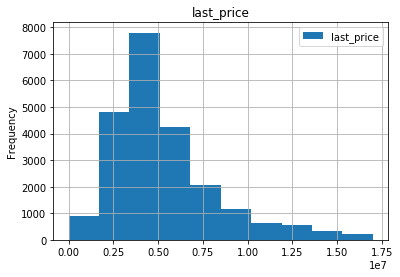

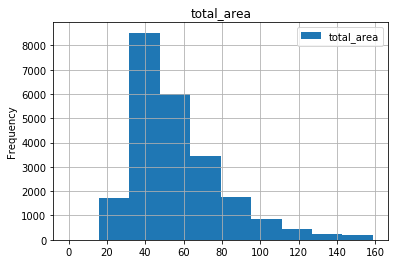

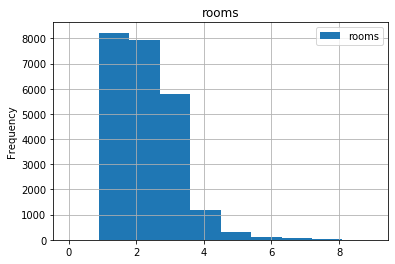

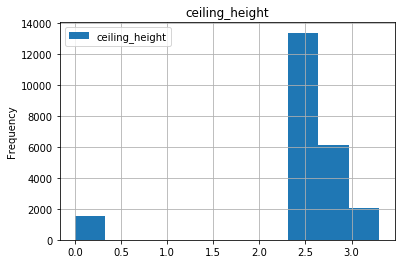

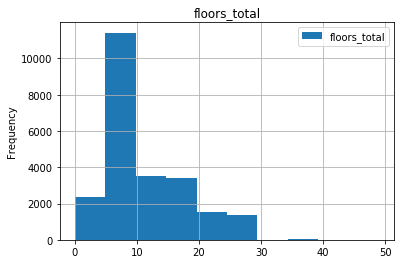

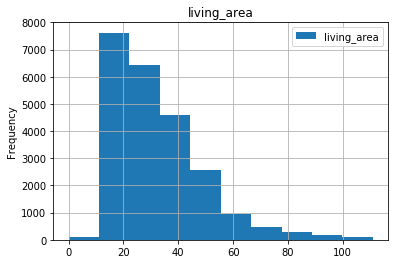

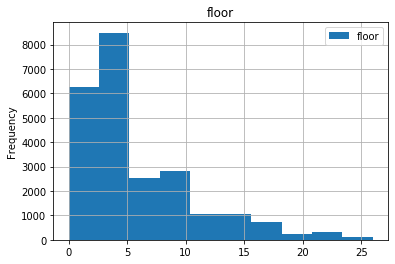

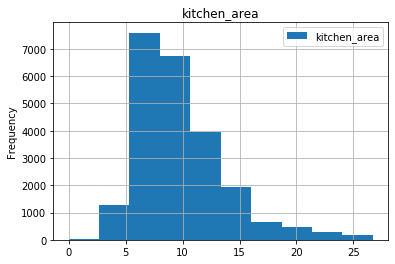

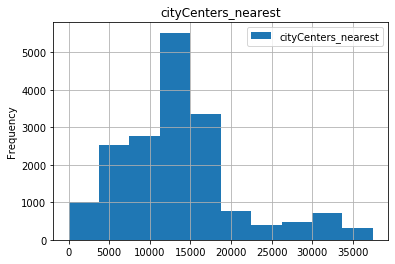

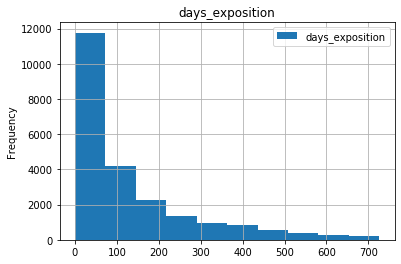

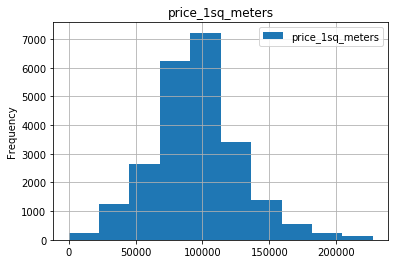

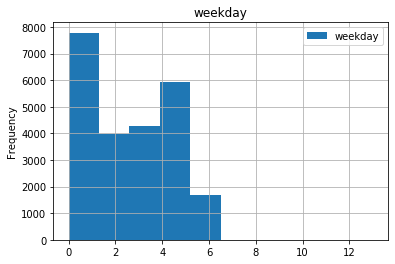

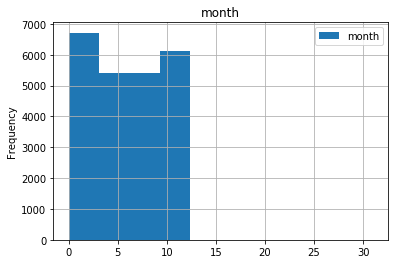

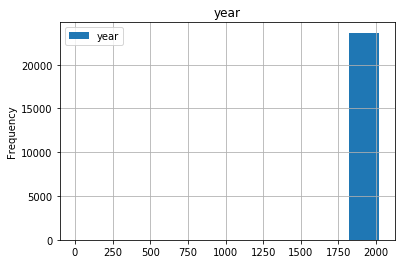

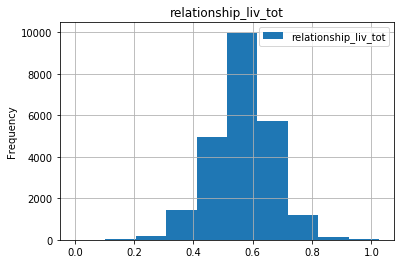

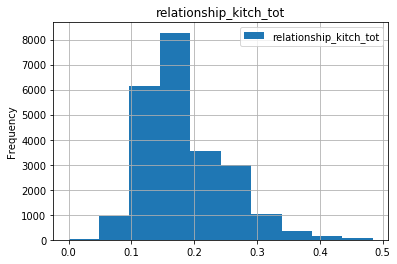

In [53]:
for row in rows:
    data = df[['locality_name', row]]
    d1 = data.describe()#определяем квантили
    d2 = d1[row]#присваиваем столбец новому параметру
    d3 = 3 * (d2[6] - d2[4]) + d2[6]#находим межквартильный размах (извини за колхоз, но из d1 у меня не получается извлечь необходимую ячейку)
    data.plot(y=row, kind='hist', title=row, bins=10, range=(0, d3), grid=True)#строим гистограммы для каждого необходимого параметра

Итак, судя по гистограммам
1. Цена квартир варьируется от 2 до 6 млн руб<br>
2. Площадь квартир от 35 до 60 м2<br>
3. В Питере и его пригородах преобладают однокомнатные и двухкомнатные квартиры<br>
4. Высота потолков от 2.7 до 3.5 м (получили выброс 0,4 м)<br>
5. Имеем большое кол-во 8-10 этажек<br>
6. Жилая площадь от 15 до 38 м2<br>
7. В основном продаваемые квартиры находятся на 3-5 этажах (это и нормально раз у нас в основном 8-10 этажки)<br>
8. Площадь кухонь от 6 до 15 м2<br>
9. Среднее расстояние до центра 15 км<br>
10.В основном люди продают квартиры в течение 90 дней (3 месяцев)<br>
11.Цена за кв метр 100-120 тыс.<br>
12.Больше всего объявлений было выложено в пн-вт<br>
13.Зимой<br>
14.В двухтысячных=D (далее мы увидим отдельно на гистограмме распределние по годам)<br>
15.Доля жилого помещения от общей площади 50-60%<br>
16.Доля кухни от общей площади 15-20%<br>

Необходимо изучить время продажи квартиры (построить гистограмму, посчитать среднее и медиану). 

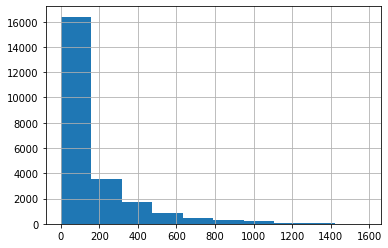

In [54]:
df['days_exposition'].hist(bins=10)

In [55]:
data=df[['locality_name', 'days_exposition']]

По гистограмме видим, что в среднем продажа длится от 0 до 200 дней, бывают случаи, когда продажа достигает 1400 дней. Построим диаграмму размаха и вывдем все необходимые значения.

In [56]:
data

,locality_name,days_exposition
0,Санкт-Петербург,0
1,посёлок Шушары,81
2,Санкт-Петербург,558
3,Санкт-Петербург,424
4,Санкт-Петербург,121
...,...,...
23694,Санкт-Петербург,0
23695,Тосно,45
23696,село Рождествено,0
23697,Санкт-Петербург,602


In [57]:
data.describe()

,days_exposition
count,23650.000000
mean,156.448964
std,213.564548
min,0.000000
25%,22.000000
50%,73.000000
75%,198.000000
max,1580.000000


(0, 600)

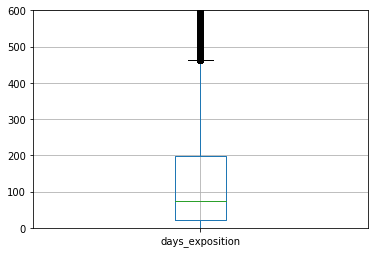

In [58]:
data.boxplot()
plt.ylim(0,600)

По диаграмме размаха видим, что все что больше 500 дней можно считать слишком долго (посчитаем их выбросами). Также видим, что минимальное время размещения на сайте 1 день, что в принципе невозможно, т.к. при оптимальном варианте квартира продается за неделю. Значит нам необходимо провести выборку от 7 до 500 дней.

In [59]:
data = data[(data['days_exposition'] > 7) & (data['days_exposition']<500)]

In [60]:
data.describe()

,days_exposition
count,17875.000000
mean,132.652923
std,118.749448
min,8.000000
25%,45.000000
50%,90.000000
75%,188.000000
max,499.000000


Итак, среднее значение 132 дня, а медиана 90 дней, медиана более устойчива к выбросам. Построим гистограмму на основе среза

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e6341b210>]],
      dtype=object)

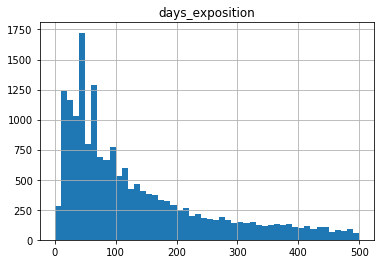

In [61]:
data.hist(bins=50, range=(0, 500))

Обычно продажа квартиры занимает в районе 40-50 дней. Видимо все, что больше 90 дней считается необычно долго (видимо хозяин квартиры не особо торопится оформлять бумажки и продавать квартиру). Бывают случаи, что продажа происходит дней за 20-30 (видимо все документы подготовлены и осталось оформить договор купли-продажи)

In [62]:
rows = (['last_price', 'total_area', 
       'rooms', 'ceiling_height', 'living_area',
       'kitchen_area','days_exposition', 'price_1sq_meters'])

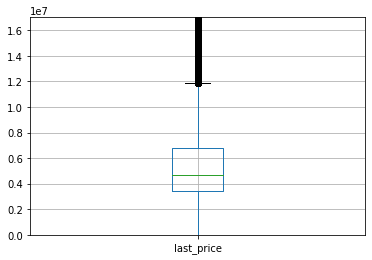

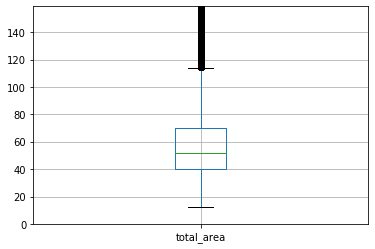

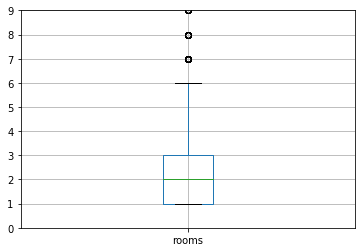

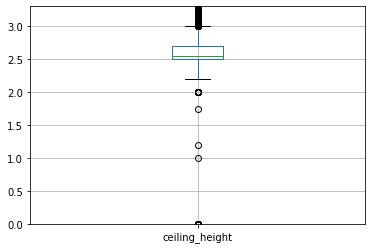

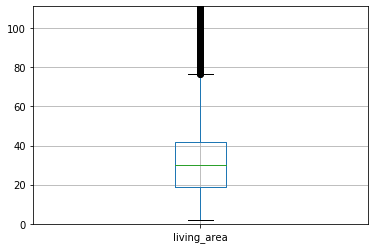

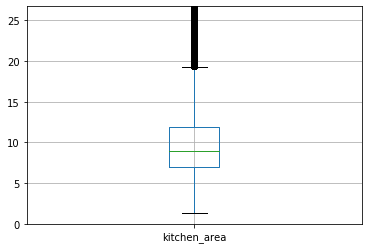

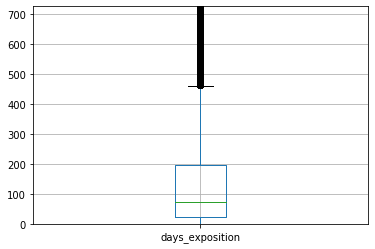

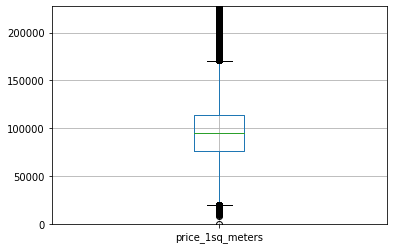

In [63]:
for row in rows:
    data = df[['locality_name', row]]
    d1 = data.describe()#определяем квантили
    d2 = d1[row]#присваиваем столбец новому параметру
    d3 = 3 * (d2[6] - d2[4]) + d2[6]#определяем межквартильный размах
    data.plot(kind='box', grid=True)
    plt.ylim(0,d3)#отрицательных значений у нас нет и не должно быть, d3 определяется в зависимости от столбца

Мы построили boxplotы для параметров, наиболее сильно влияющие на выбросы (ибо остальные параметры или не нужны или производные от данных параметров)
1. Цену примем от 1 млн (в пригорода Спб вполне возможно) до 12 млн руб<br>
2. Площадь я бы взял все-таки начиная от 20 м2 (все что ниже мне кажетс продают комнаты в квартирах) до 120 м2<br>
3. Кол-во комнат от 1 до 6<br>
4. Высота потолков от 2,5 до 3,2 м примем<br>
5. Жил. площадь примем от 8 до 78 м2<br>
6. Кухню от 3 (для студии) до 20 м2<br>
7. Кол-во дней мы уже нашли наверху от 7 до 500 дней<br>
8. Цена за квадратный метр варьируется от 25 тыс до 150 тыс. Примем нижнюю планку 50 тыс (не верю я что может стоить так дешево квартира даже в пригороде Питера)

In [64]:
df = df.query('(1e6 <= last_price <= 1.2e7) and (20 <= total_area <= 120) and (1 <= rooms <= 6) and (2.5 <= ceiling_height <= 3.2) and (8 <= living_area <= 78) and (3 <= kitchen_area <= 78) and (7 < days_exposition < 500) and (50000 <= price_1sq_meters <= 150000)')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13387 entries, 1 to 23695
Data columns (total 29 columns):
total_images              13387 non-null int64
last_price                13387 non-null float64
total_area                13387 non-null float64
first_day_exposition      13387 non-null datetime64[ns]
rooms                     13387 non-null int64
ceiling_height            13387 non-null float64
floors_total              13387 non-null int64
living_area               13387 non-null float64
floor                     13387 non-null int64
is_apartment              13387 non-null bool
studio                    13387 non-null bool
open_plan                 13387 non-null bool
kitchen_area              13387 non-null float64
balcony                   13387 non-null int64
locality_name             13387 non-null object
airports_nearest          10857 non-null float64
cityCenters_nearest       10868 non-null float64
parks_around3000          10868 non-null float64
parks_nearest         

In [66]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year,flat_floor,relationship_liv_tot,relationship_kitch_tot
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81,82920.0,1,12,2018,первый,0.460396,0.272277
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,2.50,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.0,0,9,2018,другой,0.473684,0.299342
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289,88524.0,6,2,2017,другой,0.714754,0.106557
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525.0,3,11,2017,другой,0.512626,0.214646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.0,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.0,0,Санкт-Петербург,15632.0,14428.0,0.0,0.0,0.0,0.0,23,91089.0,0,4,2019,другой,0.623762,0.148515
23689,13,3550000.0,35.3,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.1,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29,100566.0,2,2,2018,другой,0.461756,0.257790
23690,3,5500000.0,52.0,2018-07-19,2,2.50,5,31.0,2,False,False,False,6.0,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,0.0,15,105769.0,3,7,2018,другой,0.596154,0.115385
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.0,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239,73717.0,4,8,2016,другой,0.641026,0.128205


Из 23 тыс, получили только почти 13 тыс. обработанных строк. Чтож, будем на основе этих данных проводить исследовательский режим

Необходимо определить какие факторы больше всего влияют на цену квартиры.<br>
1. Построим график зависимости цены за кв метр от общей площади квартиры

In [67]:
data = df[['locality_name','price_1sq_meters', 'total_area']]

In [68]:
data

,locality_name,price_1sq_meters,total_area
1,посёлок Шушары,82920.0,40.4
4,Санкт-Петербург,100000.0,100.0
5,городской посёлок Янино-1,95065.0,30.4
9,Санкт-Петербург,88524.0,61.0
10,Санкт-Петербург,127525.0,39.6
...,...,...,...
23688,Санкт-Петербург,91089.0,101.0
23689,Санкт-Петербург,100566.0,35.3
23690,Санкт-Петербург,105769.0,52.0
23693,Петергоф,73717.0,62.4


Посмотрим на примере Санкт-Петербурга как зависит цена за кв метр от площади

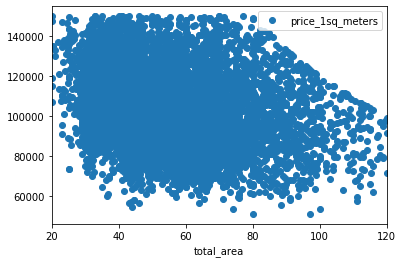

In [69]:
data.query('locality_name == "Санкт-Петербург"').plot(x='total_area', y='price_1sq_meters', style='o')

In [70]:
df['total_area'].corr(df['price_1sq_meters'])

-0.09370288805130184

По графику видим, что цена за кв метр при увеличении площади уменьшается

На графике видим, что основное кол-во лежит в диапазоне до 160 тыс руб за кв метр

In [71]:
relation = data.query('50000 < price_1sq_meters < 160000')

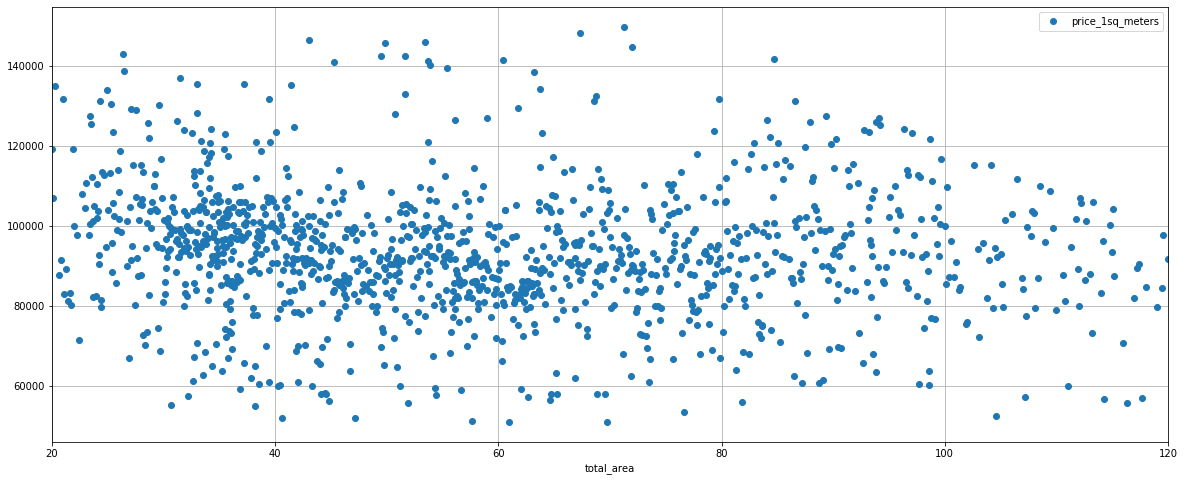

In [72]:
(relation.pivot_table(index='total_area', values='price_1sq_meters', aggfunc='median').plot(grid=True, style='o', figsize=(20, 8)))

ПО графику видим, что начиная с 80 м2, цена за кв метр не превышает 140 тыс и далее идет только на убыль (корреляция отрицательная)

Проверим как цена за кв метр зависит от кол-ва комнат

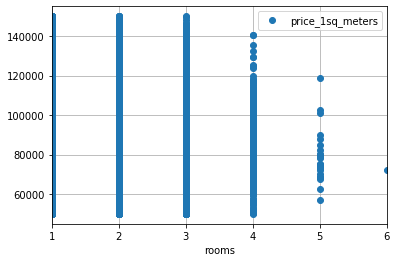

In [73]:
df.plot(x='rooms', y='price_1sq_meters', style='o', grid=True)

Чем больше комнат, тем ниже цена за квадратный метр (оно и нормально, потому что увеличение комнат предполагает увеличение площади квартиры)

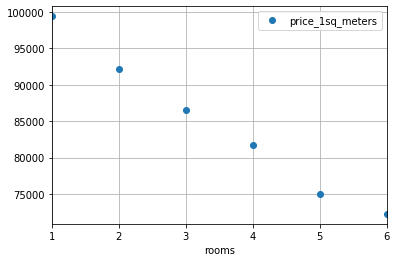

In [74]:
(df
   .pivot_table(index='rooms', values='price_1sq_meters', aggfunc='median')
   .reset_index()
   .plot(x='rooms', y='price_1sq_meters', style='o', grid=True))

In [75]:
df['rooms'].corr(df['price_1sq_meters'])

-0.22518886853360584

Как видим по корреляции, зависимость цены за кв метр и кол-ва комнат обратно пропорциональна

Выясним как этаж влияет на цену за кв метр (выделим из всего df только этажи первый и последний)

In [76]:
data_sort = df.query('flat_floor in ["первый", "последний"]')

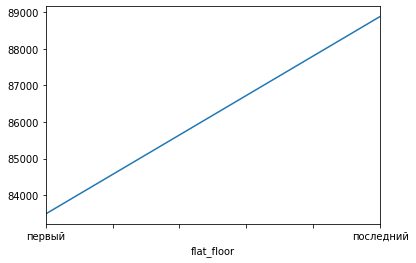

In [77]:
data_sort.groupby('flat_floor')['price_1sq_meters'].median().plot()

In [78]:
def flat_floor(row):
    if row == 'первый':
        return 1
    else:
        return 2

In [79]:
data_sort['is_floor'] = data_sort['flat_floor'].apply(flat_floor)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
data_sort['is_floor'].corr(df['price_1sq_meters'])

0.11435241317559718

Корреляция небольшая, но по графику видим средняя цена за квадратный метр на последнем этаже выше чем на первом

Проверим как изменяется цена за квадратный метр от удаленности до центра

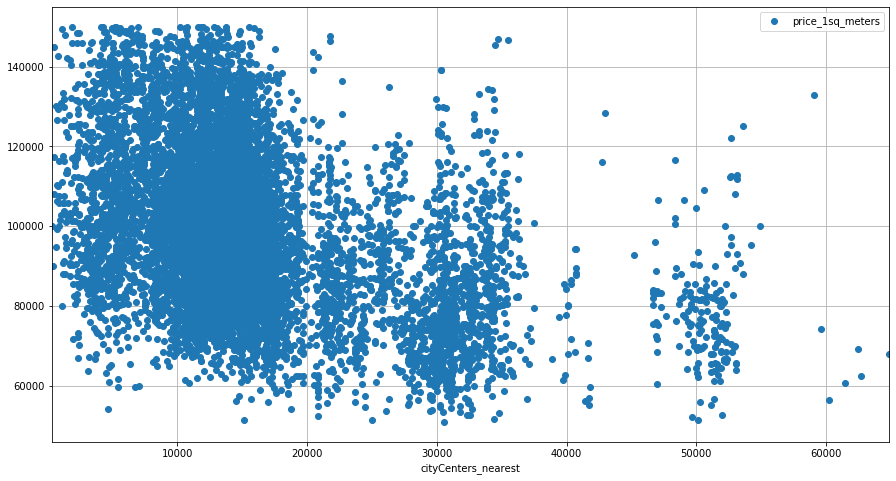

In [81]:
df.plot(x='cityCenters_nearest', y = 'price_1sq_meters', style='o', grid=True, figsize=(15,8))

In [82]:
df['cityCenters_nearest'].corr(df['price_1sq_meters'])

-0.39915754485579313

Видим обратную зависимость. Чем дальше от центра тем дешевле квартиры. (Можем считать, что центр находится в радиусе 8 км). В тоже время видим, что в центре есть квартиры 50 тыс за кв. метр что тоже очень подозрительно.

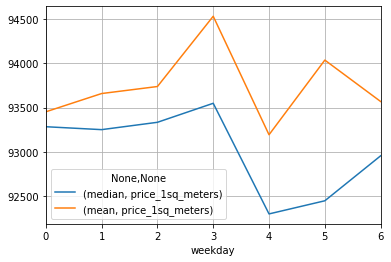

In [83]:
df.pivot_table(index='weekday', values='price_1sq_meters', aggfunc = ['median', 'mean']).plot(grid=True)

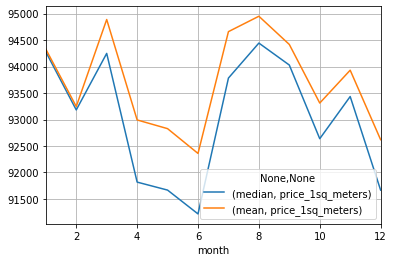

In [84]:
df.pivot_table(index='month', values='price_1sq_meters', aggfunc=['median', 'mean']).plot(grid=True)

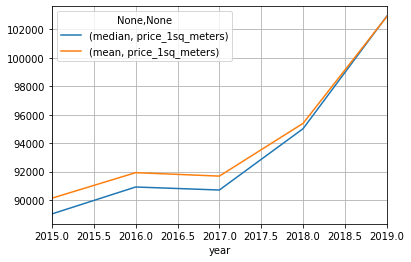

In [85]:
df.pivot_table(index='year', values='price_1sq_meters', aggfunc=['median', 'mean']).plot(grid=True)

C 2015 года и до 2017 года шло небольшой рост цен за кв метр и начиная с 2017 пошел резкий рост

In [86]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year,relationship_liv_tot,relationship_kitch_tot
total_images,1.000000,0.141745,0.097024,0.070415,0.033937,0.029747,0.082109,0.039293,0.015245,-0.022352,-0.014405,0.056140,0.036371,0.008343,-0.033591,-0.002864,0.002502,-0.022503,-0.024827,0.000406,0.103920,0.002546,0.012151,0.128082,0.009386,-0.029321
last_price,0.141745,1.000000,0.796631,0.544140,0.338892,0.162014,0.682779,0.106888,0.007679,-0.073188,-0.051018,0.501815,0.082080,-0.027265,-0.318832,0.087699,0.101786,0.121464,0.041583,0.058049,0.497078,-0.004557,0.009876,0.010051,0.095984,-0.193771
total_area,0.097024,0.796631,1.000000,0.801510,0.242967,0.004150,0.915225,-0.016864,0.000512,-0.103044,-0.065887,0.480719,0.076703,-0.022204,-0.121672,0.049950,0.046463,0.089994,0.029105,0.095569,-0.093703,-0.007921,0.013318,-0.061814,0.252288,-0.391222
rooms,0.070415,0.544140,0.801510,1.000000,0.037773,-0.200708,0.894825,-0.159752,-0.017820,-0.075408,-0.046668,0.098665,0.013463,-0.043843,-0.084282,0.047302,0.022256,0.015936,-0.006565,0.067518,-0.225189,-0.005411,0.009931,-0.051152,0.589544,-0.622985
ceiling_height,0.033937,0.338892,0.242967,0.037773,1.000000,0.138430,0.159815,0.079733,0.057700,0.019521,-0.002268,0.289308,0.052177,-0.051147,-0.182913,0.115394,0.034554,0.117579,0.036178,0.056335,0.219293,-0.009304,-0.009311,0.029277,-0.111460,0.106170
floors_total,0.029747,0.162014,0.004150,-0.200708,0.138430,1.000000,-0.141603,0.650329,-0.014457,0.070243,0.035363,0.300546,0.206692,0.081170,-0.073285,-0.206549,-0.093699,-0.080565,-0.011244,-0.040641,0.299970,0.006160,0.006492,0.036954,-0.360656,0.340313
living_area,0.082109,0.682779,0.915225,0.894825,0.159815,-0.141603,1.000000,-0.118562,-0.005856,-0.065666,-0.043353,0.200205,0.034624,-0.041548,-0.114506,0.073376,0.042796,0.062018,0.015427,0.083323,-0.159006,-0.002266,0.008142,-0.059368,0.603114,-0.602387
floor,0.039293,0.106888,-0.016864,-0.159752,0.079733,0.650329,-0.118562,1.000000,-0.008948,0.037987,0.014460,0.198486,0.188089,0.048426,-0.044459,-0.135727,-0.055997,-0.044924,-0.003811,-0.031488,0.225854,0.004791,0.014328,0.028658,-0.262494,0.243549
is_apartment,0.015245,0.007679,0.000512,-0.017820,0.057700,-0.014457,-0.005856,-0.008948,1.000000,-0.002694,-0.001826,0.010715,0.034325,0.018011,0.013531,-0.020616,-0.023486,0.005142,0.037072,0.000813,0.011897,-0.011094,-0.006658,0.018022,-0.018038,0.008675
studio,-0.022352,-0.073188,-0.103044,-0.075408,0.019521,0.070243,-0.065666,0.037987,-0.002694,1.000000,-0.003869,-0.098636,0.028503,-0.020732,-0.014632,-0.035099,-0.027067,0.005150,0.009058,-0.022072,0.040688,0.001020,0.004586,0.008615,0.089124,-0.028742


Найдем 10 населенных пунктов с наибольшим кол-вом объявлений

In [87]:
top10_count_city = (df.pivot_table(index='locality_name', values='last_price', aggfunc='count')
                      .sort_values(by='last_price',ascending=False)
                      .reset_index()
                      .head(10))

In [88]:
top10_count_city.columns=[['locality_name', 'count']]

In [89]:
top10_count_city

,locality_name,count
0,Санкт-Петербург,9217
1,посёлок Мурино,317
2,посёлок Шушары,295
3,Всеволожск,279
4,Колпино,267
5,Пушкин,237
6,Гатчина,218
7,деревня Кудрово,205
8,Петергоф,152
9,посёлок Парголово,141


Определим среднюю, максимальную и минимальную цены для данных населенных пунктов

In [90]:
top10_mean_price = (df
   .query('locality_name in ["Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "деревня Кудрово", "Выборг"] ')
   .pivot_table(index='locality_name', values='last_price', aggfunc=['mean', 'max', 'min'])
   .reset_index()
   )

In [91]:
top10_mean_price.columns=[['locality_name', 'mean', 'max', 'min']]

In [92]:
top10_mean_price

,locality_name,mean,max,min
0,Всеволожск,3.651506e+06,10890000.0,1150000.0
1,Выборг,3.125815e+06,7200000.0,1600000.0
2,Гатчина,3.419106e+06,9500000.0,1500000.0
3,Колпино,3.759757e+06,8600000.0,2100000.0
4,Пушкин,5.119301e+06,11900000.0,1990000.0
5,Санкт-Петербург,5.360964e+06,12000000.0,1846648.0
6,деревня Кудрово,4.270210e+06,10500000.0,2100000.0
7,посёлок Мурино,3.760799e+06,7940000.0,1730000.0
8,посёлок Парголово,4.399234e+06,9140000.0,2500000.0
9,посёлок Шушары,4.098584e+06,10100000.0,1850000.0


Как и предполагалось максимальная цена в Спб 12 млн руб, минимальная в Всеволожске 1,15 млн руб

Итаг, в данной задаче были рассмотрены как зависит цена от многих факторов. Мы выяснили что с увеличением площади увличивается и цена за кв метр, чем дальше мы от центра тем дешевле квартиры идут. Остальные факторы несильно влияют на цену квартиры

Изучим предложения для квартир в Санкт-Петербурге

In [93]:
df_spb = df[(df['locality_name']=='Санкт-Петербург') & (~df['cityCenters_nearest'].isnull())].reset_index()

In [94]:
df_spb['center_nearest_km'] = df_spb['cityCenters_nearest']//1000

In [95]:
df_spb

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year,flat_floor,relationship_liv_tot,relationship_kitch_tot,center_nearest_km
0,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой,0.320000,0.410000,8.0
1,9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,...,50898.0,15008.0,0.0,0.0,0.0,0.0,289,88524.0,6,2,2017,другой,0.714754,0.106557,15.0
2,10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,...,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525.0,3,11,2017,другой,0.512626,0.214646,13.0
3,15,16,4650000.0,39.0,2017-11-18,1,2.50,14,20.5,5,False,False,False,7.6,1,...,12900.0,14259.0,1.0,590.0,1.0,296.0,19,119230.0,5,11,2017,другой,0.525641,0.194872,14.0
4,16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,...,22108.0,10698.0,3.0,420.0,0.0,0.0,397,81707.0,3,11,2017,первый,0.678049,0.109756,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,23686,8,3300000.0,31.0,2017-04-29,1,2.55,9,18.0,6,False,False,False,6.5,0,...,11751.0,11602.0,1.0,140.0,1.0,317.0,193,106451.0,5,4,2017,другой,0.580645,0.209677,11.0
9203,23687,6,3200000.0,39.0,2017-12-16,1,2.50,9,20.0,6,False,False,False,11.0,2,...,40837.0,16704.0,0.0,0.0,0.0,0.0,38,82051.0,5,12,2017,другой,0.512821,0.282051,16.0
9204,23688,19,9200000.0,101.0,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.0,0,...,15632.0,14428.0,0.0,0.0,0.0,0.0,23,91089.0,0,4,2019,другой,0.623762,0.148515,14.0
9205,23689,13,3550000.0,35.3,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.1,2,...,17284.0,16081.0,1.0,353.0,2.0,652.0,29,100566.0,2,2,2018,другой,0.461756,0.257790,16.0


In [96]:
df_spb['center_nearest_km'] = df_spb['center_nearest_km'].astype('int64')

Создадим дополнительный столбец, который посчитает цену за 1 км

In [97]:
df_spb['mid_price_1km'] = df_spb['last_price'] // df_spb['center_nearest_km']

In [98]:
df_spb.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year,relationship_liv_tot,relationship_kitch_tot,center_nearest_km,mid_price_1km
count,9207.000000,9207.000000,9.207000e+03,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9196.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.0
mean,11838.293798,9.891170,5.360690e+06,53.336553,1.962420,2.625972,11.027153,30.725325,5.997936,9.349023,0.603780,28340.607982,12566.241773,0.554361,212.702075,0.661888,257.478332,127.768872,101580.581080,2.553057,6.627783,2017.328989,0.568181,0.183701,12.066145,inf
std,6744.892292,5.478524,1.941675e+06,17.940552,0.880239,0.156570,5.724363,12.563825,4.543499,3.665049,0.946573,12150.463823,4305.707130,0.727516,323.498991,0.839657,332.514381,116.933035,18349.505891,1.772709,3.446614,0.854916,0.095665,0.064284,4.307392,NaN
min,4.000000,0.000000,1.846648e+06,20.000000,1.000000,2.500000,0.000000,8.000000,1.000000,3.000000,0.000000,6450.000000,329.000000,0.000000,0.000000,0.000000,0.000000,8.000000,51250.000000,0.000000,1.000000,2015.000000,0.173077,0.059122,0.000000,83333.0
25%,5995.500000,6.000000,3.935000e+06,40.000000,1.000000,2.500000,5.000000,19.000000,3.000000,6.992586,0.000000,17399.000000,10414.000000,0.000000,0.000000,0.000000,0.000000,42.000000,88187.500000,1.000000,3.000000,2017.000000,0.510008,0.138665,10.000000,295638.5
50%,11822.000000,10.000000,4.880000e+06,49.800000,2.000000,2.580000,9.000000,29.700000,5.000000,8.500000,0.000000,27832.000000,12912.000000,0.000000,0.000000,0.000000,0.000000,85.000000,100000.000000,3.000000,7.000000,2017.000000,0.562500,0.163265,12.000000,395454.0
75%,17604.500000,14.000000,6.390000e+06,63.695000,3.000000,2.700000,16.000000,39.300000,8.000000,11.000000,1.000000,37377.500000,15261.000000,1.000000,417.000000,1.000000,516.000000,179.000000,113405.500000,4.000000,10.000000,2018.000000,0.634921,0.222222,15.000000,597457.5
max,23690.000000,32.000000,1.200000e+07,120.000000,6.000000,3.200000,52.000000,78.000000,28.000000,48.300000,5.000000,54723.000000,29493.000000,3.000000,3190.000000,3.000000,1337.000000,499.000000,150000.000000,6.000000,12.000000,2019.000000,0.973262,0.787879,29.000000,inf


In [99]:
df_spb_pivot = df_spb.pivot_table(index='center_nearest_km', values='last_price', aggfunc='mean').reset_index()
df_spb_pivot

,center_nearest_km,last_price
0,0,8.024684e+06
1,1,7.948404e+06
2,2,7.267504e+06
3,3,6.995504e+06
4,4,7.211698e+06
5,5,7.014008e+06
6,6,6.373142e+06
7,7,6.545831e+06
8,8,5.904343e+06
9,9,5.110156e+06


In [100]:
#по медиане цена 1 км 400 тыс. руб

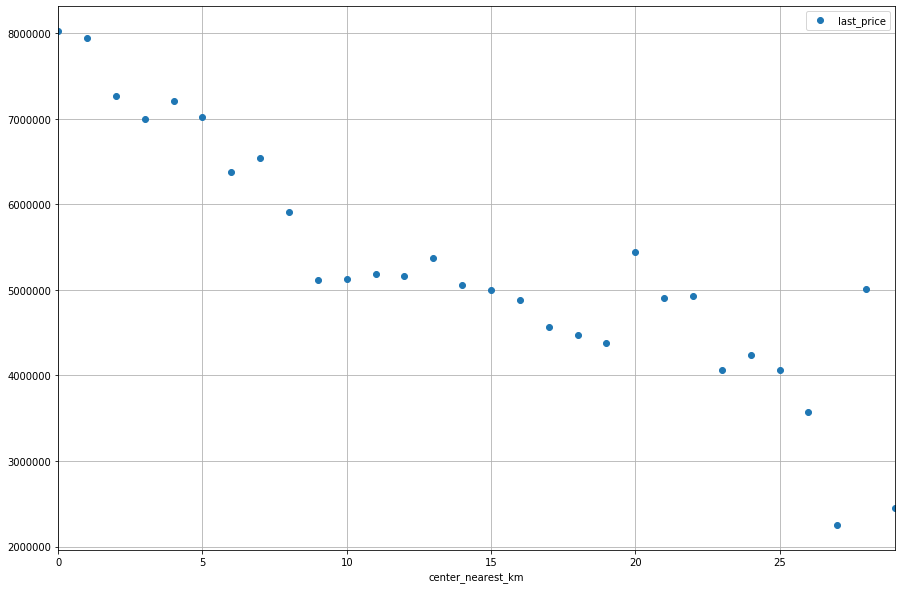

In [101]:
df_spb_pivot.plot(x='center_nearest_km', y='last_price', style='o', grid=True, figsize=(15,10))

Центральная зона заканчивается на 8 км.(Видим что скачок имеется на 20 км и 27 км, мб данные квартиры расположены вдоль залива с видом на Лахта центр)

In [102]:
#выделим сегмент квартир в центре т.е. в радиусе 8 км
df_spb_center = df_spb[(df_spb['center_nearest_km'] < 8)]

In [103]:
df_spb_center

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year,flat_floor,relationship_liv_tot,relationship_kitch_tot,center_nearest_km,mid_price_1km
7,24,8,6500000.0,97.2,2015-10-31,2,2.55,3,46.500000,1,False,False,False,19.600000,0,...,2336.0,3.0,411.0,3.0,124.0,265,66872.0,5,10,2015,первый,0.478395,0.201646,2,3250000.0
29,99,32,9600000.0,90.0,2017-09-26,4,2.50,5,67.000000,2,False,False,False,8.000000,0,...,2818.0,0.0,0.0,0.0,0.0,104,106666.0,1,9,2017,другой,0.744444,0.088889,2,4800000.0
34,111,4,4590000.0,40.0,2017-05-29,1,2.80,6,18.000000,1,False,False,False,10.000000,0,...,6175.0,1.0,241.0,0.0,0.0,31,114750.0,0,5,2017,первый,0.450000,0.250000,6,765000.0
43,138,8,4800000.0,40.0,2017-11-18,2,2.55,3,29.000000,2,False,False,False,6.000000,0,...,2913.0,0.0,0.0,2.0,729.0,80,120000.0,5,11,2017,другой,0.725000,0.150000,2,2400000.0
44,143,9,2990000.0,30.0,2016-06-08,1,2.50,9,20.000000,9,False,False,False,5.600000,0,...,6262.0,0.0,0.0,1.0,332.0,60,99666.0,2,6,2016,последний,0.666667,0.186667,6,498333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,23632,20,5000000.0,38.0,2018-06-23,1,2.55,16,21.169045,15,False,False,False,6.158621,1,...,7257.0,1.0,241.0,1.0,230.0,113,131578.0,5,6,2018,другой,0.557080,0.162069,7,714285.0
9189,23644,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.300000,4,False,False,False,12.100000,0,...,4415.0,1.0,560.0,1.0,171.0,166,79840.0,3,4,2018,последний,0.516800,0.193600,4,1247500.0
9196,23665,11,4250000.0,47.0,2016-05-20,1,2.80,6,18.200000,1,False,False,False,14.600000,0,...,4946.0,2.0,624.0,1.0,519.0,131,90425.0,4,5,2016,первый,0.387234,0.310638,4,1062500.0
9201,23681,13,5250000.0,43.0,2018-05-11,2,2.50,5,29.000000,2,False,False,False,6.000000,0,...,7262.0,1.0,497.0,2.0,660.0,80,122093.0,4,5,2018,другой,0.674419,0.139535,7,750000.0


In [104]:
#В итоге осталось всего 1311 объявления, которые расположены в центре

In [105]:
df_spb_center.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sq_meters,weekday,month,year,relationship_liv_tot,relationship_kitch_tot,center_nearest_km,mid_price_1km
count,1311.000000,1311.000000,1.311000e+03,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.0
mean,12053.192982,9.420290,6.953526e+06,64.725248,2.334859,2.744733,6.900839,38.206496,3.970252,10.703752,0.238749,24377.586260,5007.367658,0.930587,304.869565,1.202136,342.215103,147.16476,109878.228070,2.556064,6.678108,2017.211289,0.584199,0.172478,4.513349,inf
std,6823.383904,5.521051,2.111936e+06,20.511360,0.893572,0.227523,3.648184,14.673285,2.821380,4.590836,0.608007,4566.404116,1749.821455,0.861688,341.768591,1.059826,317.099018,124.59175,20119.218418,1.726230,3.420879,0.865132,0.097805,0.068468,1.742052,NaN
min,24.000000,0.000000,2.385000e+06,20.000000,1.000000,2.500000,2.000000,9.000000,1.000000,3.200000,0.000000,12729.000000,329.000000,0.000000,0.000000,0.000000,0.000000,8.00000,54000.000000,0.000000,1.000000,2015.000000,0.210393,0.060606,0.000000,362857.0
25%,6103.500000,6.000000,5.300000e+06,48.000000,2.000000,2.500000,5.000000,27.800000,2.000000,8.000000,0.000000,20946.250000,3848.000000,0.000000,0.000000,0.000000,0.000000,53.00000,94444.000000,1.000000,4.000000,2017.000000,0.534874,0.129679,3.000000,1041633.0
50%,12273.000000,9.000000,6.750000e+06,63.000000,2.000000,2.700000,5.000000,36.000000,3.000000,9.800000,0.000000,24082.000000,5126.000000,1.000000,261.000000,1.000000,304.000000,103.00000,108278.000000,3.000000,7.000000,2017.000000,0.588595,0.161117,5.000000,1550000.0
75%,18044.500000,13.000000,8.500000e+06,79.250000,3.000000,3.000000,9.000000,48.000000,5.000000,12.375000,0.000000,27785.250000,6291.000000,1.000000,506.500000,2.000000,586.500000,215.50000,125232.000000,4.000000,10.000000,2018.000000,0.652605,0.193548,6.000000,2227500.0
max,23690.000000,32.000000,1.200000e+07,119.600000,5.000000,3.200000,25.000000,78.000000,19.000000,48.300000,5.000000,39763.000000,7998.000000,3.000000,2295.000000,3.000000,1199.000000,497.00000,150000.000000,6.000000,12.000000,2019.000000,0.931034,0.560526,7.000000,inf


1. Средняя цена в центре 7 млн руб, по медиане 6,75 млн. Максимальная цена 12 млн.<br>
2. Минимальная площадь 20 м2 при стоимости в 2,38 млн руб.<br>
3. Максимальное кол-во комнат 5 (6 комнат в центр не вошли)<br>
4. С потолками все ок (максимум 3,2 м)

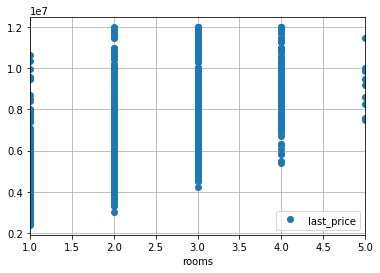

In [106]:
#проверим как зависит стоимость квартиры от кол-ва комнат, этажа
df_spb_center.plot(x='rooms', y='last_price', style='o', grid=True)

In [107]:
df_spb_center['rooms'].corr(df_spb_center['last_price'])

0.5427031118610274

Цена с увеличением кол-ва комнат растет

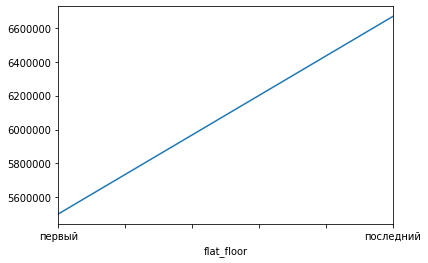

In [108]:
#проверим как зависит цена от этажа
df_spb_center.query('flat_floor in ["первый", "последний"]').groupby('flat_floor')['last_price'].median().plot()

Как видим, в среднем цены на первом этаже ниже чем на последнем (также было и со всем городом)

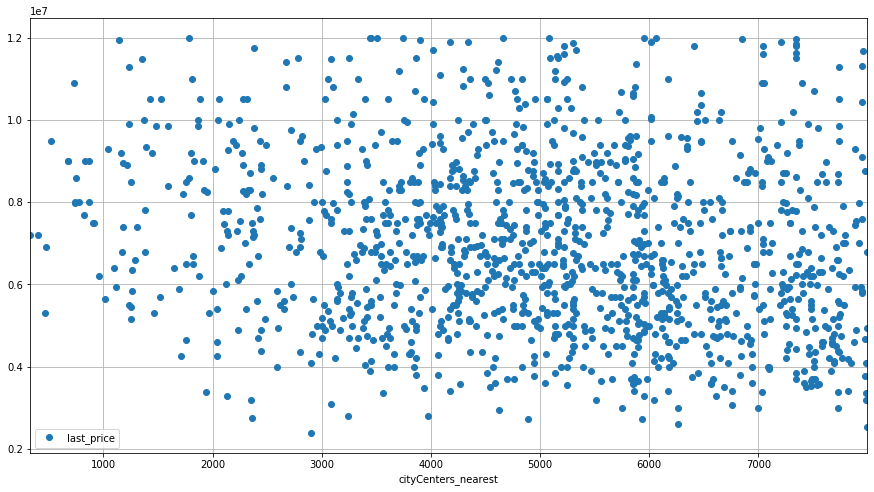

In [109]:
#проверим как зависит цена от удаленности от центра
df_spb_center.plot(x='cityCenters_nearest', y = 'last_price', style='o', grid=True, figsize=(15,8))

In [110]:
df_spb_center['cityCenters_nearest'].corr(df_spb_center['last_price'])

-0.17298401718049933

В пределах центра цена практически не зависит от удаленности от центра (небольшая отрицательная корреляция)

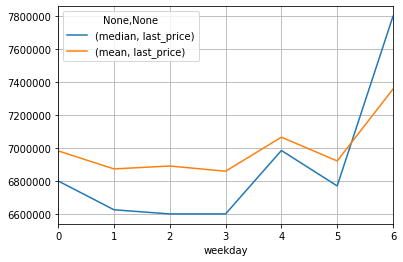

In [111]:
#проверим зависимость цены на квартиры от дня недели
df_spb_center.pivot_table(index='weekday', values='last_price', aggfunc = ['median', 'mean']).plot(grid=True)

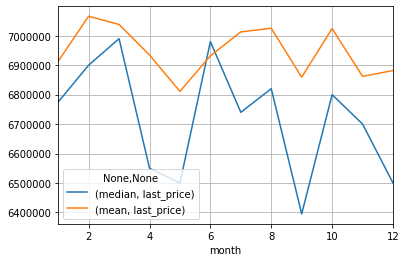

In [112]:
#проверим зависимость цены на квартиры от месяца
df_spb_center.pivot_table(index='month', values='last_price', aggfunc = ['median', 'mean']).plot(grid=True)

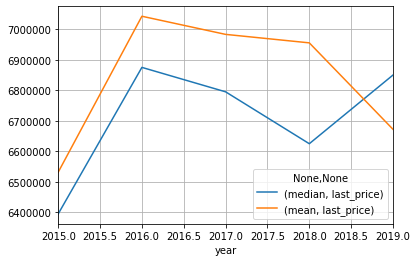

In [113]:
#проверим зависимость цены на квартиры от года
df_spb_center.pivot_table(index='year', values='last_price', aggfunc = ['median', 'mean']).plot(grid=True)

In [114]:
df_spb_center['year'].corr(df_spb_center['last_price'])

-0.0014307636814160714

In [115]:
df_spb_center['month'].corr(df_spb_center['last_price'])

-0.014972991050323977

In [116]:
df_spb_center['weekday'].corr(df_spb_center['last_price'])

0.0283892393990505

Судя по корреляции, день недели, месяц и год никак не зависят от цены

Итак, в данной главе мы произвели выборку всех квартир СпБ, находящихся в центре. Определили какие параметры влияют на цены на квартиры. В итоге оказалось, что внутри центра радиусом 8 км стоимость квартир примерно на одном уровне. Квартиры, расположенные на последнем этаже, в среднем дороже тех квартир, которые на первом этаже. Чем больше комнат, тем выше стоимость квартир. От даты размещения, стоимость квартир никак не влияет.

<a id='section_id5'></a>

### 5. Общий вывод

В данном проекте нам необходимо было провести предобработку данных, добавить дополнительные для работы столбцы и провести исследовательский анализ зависимости стоимости квартир от следующих параметров (площади квартиры, кол-ва комнат, высоты потолков, этажа, удаленность от центра, даты размещения объявления). Были исключены выбросы с помощью графиков boxplot (например высота потолков 100 м, стоимость квартир в Спб за 12900 руб и т.д.). По итогам анализа было выявлено, что с увеличением площади квартиры уменьшается и его цена за квадратный метр во всех населенных пунктах. Имеется зависимость стоимость квартиры от удаленности до центра (чем мы дальше тем дешевле квартиры). Были выявлены 10 населенных пунктов с большим кол-вом объявлений. Найдены средние цены по данным населенным пунктам, максимальные и минимальные. Максимальная стоимость была в Питере за 12 млн руб (после удаления выбросов), самая минимальная в Всеволожске за 1,12 млн руб. Также был проведен исследовательский анализ в центре Питера (в радиусе 8 км). В данном случае удаленность от центра никак не влияло на стоимость квартир (просто чем дальше от центра, тем больше объявлений). Также по графикам было видно что цены на квартиры начали резко расти с 2017 года. 